# Project Part B: Data Science in Action! 
Genocide in Gaza: Telling the Story through Data Science!

Please find the solution for the project below:

In [1]:
# doing necessary imports

import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# 1. Preprocressing
## Dealing with the PDF
first, converting the PDF list in the "killed-in-gaza_moh_2024-09-21.pdf" file to CSV. 

I will use the `camelot` library ([access the docs here](https://camelot-py.readthedocs.io/en/master/index.html)) to read the pdf:

In [ ]:
import camelot # i asked the professor if we could use external library to parse the pdf and he said yes
 
# extracting all the tables in the PDF file
gaza_2025_cam = camelot.read_pdf('killed-in-gaza_moh_2025-03-23.pdf', pages='1-end')
gaza_2025_cam

Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong point

<TableList n=981>

After running and getting the pdf content, I run the line below to save the intermediate uncleaned data as csv files for each page (saving in case something happens because the **run time to read the pdf took 71 minutes**), the `compress=True` argument is passed to output a `zip` file which I manually unzip and then do further things mentioned below...

In [ ]:
gaza_2025_cam.export('killed-in-gaza_moh_2025-03-23.csv', f='csv', compress=True)

By looking at the output in the csv files, the column headers were mixed up, so I manually corrected them, and then I further saw 2 problems, firstly, the arabic names are backwards, secondly, the `Index` for the first row is not there and instead added to the `Name` column (so there could be more cases like this).

So below, I solved all of the problems mentioned, and then concatenating all the files into one table and then exporting it as a csv:

In [7]:
# Before doing anything, the csv files except the first one do not have column headers, so the script below prepends the column header to 
# each one except the first file which already has it

import os

# defining the directory path
gaza_2025_directory = "./killed-in-gaza_moh_2025-03-23"

# Get a list of all csv files in the directory
gaza_2025_csv_files = [f for f in os.listdir(gaza_2025_directory) if f.endswith(".csv")]

# csv header to prepend
header = '"Index","Name","الاسم","Born","Age"," Sex","ID number"\n'

# Skip the first file (it already has headers)
for csv_file in gaza_2025_csv_files[1:]:
    file_path = os.path.join(gaza_2025_directory, csv_file)

    # Read the current file contents
    with open(file_path, 'r', encoding='utf-8') as f:
        original_content = f.read()

    # Write the new content with header prepended
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(header + original_content)

In [10]:
# Now i can safely read all the files into the datascience Table()
# Initialize gaza_2025
gaza_2025 = Table().with_columns("Index", make_array(), 
                                 "Name",  make_array(), 
                                 "الاسم", make_array(),
                                 "Born", make_array(),
                                 "Age", make_array(),
                                 " Sex", make_array(),
                                 "ID number", make_array())

# Iterating over the csv files and appending them to gaza_2025
for csv_file in gaza_2025_csv_files:
    file_path = os.path.join(gaza_2025_directory, csv_file)
    table = Table.read_table(file_path)
    gaza_2025 = gaza_2025.append(table)

# Display the table
gaza_2025 

Index,Name,الاسم,Born,Age,Sex,ID number
nan,1 Mohammed Hani Mohammed Al-Zahhar,راهزلا دمحم يناه دمحم,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,ناودع دئاع دمحم رون,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,ريبش 6ما نمؤم دلاخ,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,هرودق ديرف ميهاربا نماي,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,رداقلا دبع دمحأ يمار دمحأ,2022-12-22,0,m,445808546
6,Houriya Ahmed Imran Ghaben,Dغ نارمع دمحأ ةيروح,2023-04-10,0,f,445639958
7,Zain Mohammed Khaled Al-Houbi,يبوهلا دلاخ دمحم نيز,2023-05-23,0,m,444489579
8,Rakan Mumin Mousa Rabie,عيبر يسوم نمؤم ناكر,2023-09-29,0,m,444466494
9,Taysir Mohammed Taysir Al-Hassi,يسهلا ريسيت دمحم ريسيت,2023-02-19,0,m,444496053
10,Kenan Akram Samih Karim,ميرك حيمس مركا نانك,2023-08-05,0,m,445362098


First removing the wrong indexing and attaching my own index, as you see above, the Index on the first row has `nan`

In [15]:
# replacing the "Index" column with correct index  
gaza_2025 = gaza_2025.with_column("Index", np.arange(1, gaza_2025.num_rows + 1))
gaza_2025

Index,Name,الاسم,Born,Age,Sex,ID number
1,1 Mohammed Hani Mohammed Al-Zahhar,راهزلا دمحم يناه دمحم,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,ناودع دئاع دمحم رون,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,ريبش 6ما نمؤم دلاخ,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,هرودق ديرف ميهاربا نماي,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,رداقلا دبع دمحأ يمار دمحأ,2022-12-22,0,m,445808546
6,Houriya Ahmed Imran Ghaben,Dغ نارمع دمحأ ةيروح,2023-04-10,0,f,445639958
7,Zain Mohammed Khaled Al-Houbi,يبوهلا دلاخ دمحم نيز,2023-05-23,0,m,444489579
8,Rakan Mumin Mousa Rabie,عيبر يسوم نمؤم ناكر,2023-09-29,0,m,444466494
9,Taysir Mohammed Taysir Al-Hassi,يسهلا ريسيت دمحم ريسيت,2023-02-19,0,m,444496053
10,Kenan Akram Samih Karim,ميرك حيمس مركا نانك,2023-08-05,0,m,445362098


Now correcting the english names by stripping any number attached to them:

In [18]:
import re

# Function to remove all digits from a string
def strip_numbers(text):
    return re.sub(r'\d+', '', text)

# Create a new version of the table with updated "Name" column
gaza_2025 = gaza_2025.with_column("Name", gaza_2025.apply(strip_numbers, "Name"))
gaza_2025

Index,Name,الاسم,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,راهزلا دمحم يناه دمحم,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,ناودع دئاع دمحم رون,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,ريبش 6ما نمؤم دلاخ,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,هرودق ديرف ميهاربا نماي,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,رداقلا دبع دمحأ يمار دمحأ,2022-12-22,0,m,445808546
6,Houriya Ahmed Imran Ghaben,Dغ نارمع دمحأ ةيروح,2023-04-10,0,f,445639958
7,Zain Mohammed Khaled Al-Houbi,يبوهلا دلاخ دمحم نيز,2023-05-23,0,m,444489579
8,Rakan Mumin Mousa Rabie,عيبر يسوم نمؤم ناكر,2023-09-29,0,m,444466494
9,Taysir Mohammed Taysir Al-Hassi,يسهلا ريسيت دمحم ريسيت,2023-02-19,0,m,444496053
10,Kenan Akram Samih Karim,ميرك حيمس مركا نانك,2023-08-05,0,m,445362098


Now checking if the "Born" column has any arabic name mixed with it (because I noticed this when inspecting the csv data manually):

In [19]:
# function to detect arabic characters
def contains_arabic(text):
    return bool(re.search(r'[\u0600-\u06FF]', text))

# filter rows where "Name" contains Arabic
born_bad_rows = gaza_2025.where("Born", contains_arabic)
born_bad_rows

Index,Name,الاسم,Born,Age,Sex,ID number
26,Saber Jabr Salman Al-Hasanat,nan,تانسحلا ناملس ربج رباص 2023-01-08,0,m,444362115
33,Saber Sabri Abdullah Al-Farra,nan,ارفلا oادبع ىربص رباص 2024-01-12,0,m,470084856
95,Diaa Ahmed Abdel Ati Saleh Mousa,nan,ىسوم حلاص يطاعلا دبع دمحأ ءايض 2023-03-30,0,m,445384241
159,Salah Ahmed Mohammed Al-Ghafri,nan,يرفغلا دمحم دمحأ حRص 2017-11-19,6,m,439158361
225,Saqr Hisham Hassan Ghaben,nan,Dغ نسح ماشه رقص 2017-07-27,6,m,438539736
378,Subhi Ziyad Subhi Al-Qadi,nan,يضاقلا يحبص دايز يحبص 2017-01-08,6,m,438172348
400,Salah Ahmed Salah Abdullah,nan,oادبع حRص دمحأ حRص 2017-02-01,6,m,438208712
623,Saba Mohammed Imad Shalaq,nan,قلعش دامع دمحم ابص 2022-12-06,0,f,445803919
635,Diaa Mohammed Zuhair Al-Barai,nan,يعربلا ريهز دمحم ءايض 2022-12-25,0,m,445851637
680,Saba Mohammed Ahmed Hammad,nan,دامح دمحأ دمحم ابص 2017-10-26,6,f,439008459


We see that there are many columns that have the arabic name mixed with the "Born" column and the الاسم column is filled with `nan`, so correcting it as follows:

In [ ]:
corrected_rows = []

for row in Table.Rows(born_bad_rows):
    born = row.item("Born")
    match = re.match(r'^(.*?)(\d{4}-\d{2}-\d{2})$', born.strip())
    new_ar_name = match.group(1).strip()
    new_born = match.group(2).strip()
    corrected_row = [
                row.item("Index"),
                row.item("Name"),
                new_ar_name,
                new_born,
                row.item("Age"),
                row.item(" Sex"),
                row.item("ID number"),
            ]
    corrected_rows.append(corrected_row)


Index,Name,الاسم,Born,Age,Sex,ID number
12,123,123,123,123,123,123
26,Saber Jabr Salman Al-Hasanat,تانسحلا ناملس ربج رباص,2023-01-08,0,m,444362115
33,Saber Sabri Abdullah Al-Farra,ارفلا oادبع ىربص رباص,2024-01-12,0,m,470084856
95,Diaa Ahmed Abdel Ati Saleh Mousa,ىسوم حلاص يطاعلا دبع دمحأ ءايض,2023-03-30,0,m,445384241
159,Salah Ahmed Mohammed Al-Ghafri,يرفغلا دمحم دمحأ حRص,2017-11-19,6,m,439158361
225,Saqr Hisham Hassan Ghaben,Dغ نسح ماشه رقص,2017-07-27,6,m,438539736
378,Subhi Ziyad Subhi Al-Qadi,يضاقلا يحبص دايز يحبص,2017-01-08,6,m,438172348
400,Salah Ahmed Salah Abdullah,oادبع حRص دمحأ حRص,2017-02-01,6,m,438208712
623,Saba Mohammed Imad Shalaq,قلعش دامع دمحم ابص,2022-12-06,0,f,445803919
635,Diaa Mohammed Zuhair Al-Barai,يعربلا ريهز دمحم ءايض,2022-12-25,0,m,445851637


In [31]:
def not_contains_arabic(text):
    return not bool(re.search(r'[\u0600-\u06FF]', text))

without_born_bad_rows = gaza_2025.where("Born", not_contains_arabic)

# deleting existing bad rows from gaza_2025 and replacing with corrected_rows
gaza_2025 = Table.with_rows(without_born_bad_rows, corrected_rows)
gaza_2025

Index,Name,الاسم,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,راهزلا دمحم يناه دمحم,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,ناودع دئاع دمحم رون,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,ريبش 6ما نمؤم دلاخ,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,هرودق ديرف ميهاربا نماي,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,رداقلا دبع دمحأ يمار دمحأ,2022-12-22,0,m,445808546
6,Houriya Ahmed Imran Ghaben,Dغ نارمع دمحأ ةيروح,2023-04-10,0,f,445639958
7,Zain Mohammed Khaled Al-Houbi,يبوهلا دلاخ دمحم نيز,2023-05-23,0,m,444489579
8,Rakan Mumin Mousa Rabie,عيبر يسوم نمؤم ناكر,2023-09-29,0,m,444466494
9,Taysir Mohammed Taysir Al-Hassi,يسهلا ريسيت دمحم ريسيت,2023-02-19,0,m,444496053
10,Kenan Akram Samih Karim,ميرك حيمس مركا نانك,2023-08-05,0,m,445362098


In [33]:
# final check to see if any bad born rows left
gaza_2025.where("Born", contains_arabic)

Index,Name,الاسم,Born,Age,Sex,ID number


Finally, reversing the arabic names so that they are meaningful

In [34]:
# reverse all Arabic name string
def reverse_string(name):
    return name[::-1]

# appling to the "الاسم" column
gaza_2025 = gaza_2025.with_column(
    "الاسم", gaza_2025.apply(reverse_string, "الاسم")
)
gaza_2025

Index,Name,الاسم,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,محمد هاني محمد الزهار,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,نور محمد عائد عدوان,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,خالد مؤمن ام6 شبير,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,يامن ابراهيم فريد قدوره,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,أحمد رامي أحمد عبد القادر,2022-12-22,0,m,445808546
6,Houriya Ahmed Imran Ghaben,حورية أحمد عمران غD,2023-04-10,0,f,445639958
7,Zain Mohammed Khaled Al-Houbi,زين محمد خالد الهوبي,2023-05-23,0,m,444489579
8,Rakan Mumin Mousa Rabie,ركان مؤمن موسي ربيع,2023-09-29,0,m,444466494
9,Taysir Mohammed Taysir Al-Hassi,تيسير محمد تيسير الهسي,2023-02-19,0,m,444496053
10,Kenan Akram Samih Karim,كنان اكرم سميح كريم,2023-08-05,0,m,445362098


In [35]:
# final sort (because we did added rows when correcting born column)
gaza_2025 = gaza_2025.sort("Index")

Finally storing it as a csv to keep it safe

In [36]:
gaza_2025.to_csv('gaza_2025_final.csv')

## Dealing with having two "killed-in-gaza" datasets
Next, I see that the two datasets called "killed-in-gaza" (killed-in-gaza_2024-09-21.csv and killed-in-gaza_moh_2025-03-23.pdf) have different dates of publication as well as different amount of rows, so I want to find out whether they contain duplicates from each other, and if they do, I will deduplicate them and then concatenate them to a table called `killed-in-gaza-final.csv`

In [54]:
# first reading the 2024 dataset into gaza_2024
gaza_2024 = Table.read_table('killed-in-gaza_2024-09-21.csv')
gaza_2024

id,name,en_name,age,dob,sex,source
طفللللللل,بنت اسيا نزار محمد ابووردة,Bint Asaia Nazar Muhammad Abu-warda,0,2024-07-18,f,h
طفللللل,ابن ولاء الدوواسة,Abn Wlaa Aldowasah,0,2024-06-16,m,h
طفل رضيع66,أمل محمد جمعة أبو صويص,Amal Muhammad Jmuaah Abu Sois,0,2023-12-05,f,c
طفل رضيع6,ياسر صلاح ياسر الدلو,Yasr Salah Yasr Aldlo,0,2023-10-19,m,h
طفل رضيع55,كارمل علاء وليد حمدان,Karml Alaaa Waleed Hamdan,0,2023-12-11,f,c
طفل رضيع5,ميساء ديب محمود السكافى,Maisaa Diab Mahmoud Alskafa,0,2023-11-02,f,c
طفل رضيع4,محمد نعيم نصر عياد,Muhammad Naiam Nasr Aiad,0,2023-11-28,m,c
طفل رضيع3,كنان شادي هاشم مشتهى,Knan Shadi Hashem Moshtaha,0,2023-12-04,m,c
طفل رضيع226,ابن/ انوار احمد محمد درويش,Abn/ Anwar Ahmed Muhammad Daroish,0,2023-11-04,m,h
طفل رضيع225,بنت/زينب محمد العبد نواس,Daughter of zainab Muhammad al-Abd Nawwas,0,2023-11-15,f,h


> Note: After inspecting the `gaza_2024` dataset, I noticed that newly born children did not have an id, so the placeholder for those were the values "طفل" or "طفل رضيع", but older people did have id numbers.

In [55]:
# run this cell in case you do not have gaza_2025 dataset loaded
gaza_2025 = Table.read_table('gaza_2025_final.csv')
gaza_2025

Index,Name,الاسم,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,محمد هاني محمد الزهار,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,نور محمد عائد عدوان,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,خالد مؤمن ام6 شبير,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,يامن ابراهيم فريد قدوره,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,أحمد رامي أحمد عبد القادر,2022-12-22,0,m,445808546
6,Houriya Ahmed Imran Ghaben,حورية أحمد عمران غD,2023-04-10,0,f,445639958
7,Zain Mohammed Khaled Al-Houbi,زين محمد خالد الهوبي,2023-05-23,0,m,444489579
8,Rakan Mumin Mousa Rabie,ركان مؤمن موسي ربيع,2023-09-29,0,m,444466494
9,Taysir Mohammed Taysir Al-Hassi,تيسير محمد تيسير الهسي,2023-02-19,0,m,444496053
10,Kenan Akram Samih Karim,كنان اكرم سميح كريم,2023-08-05,0,m,445362098


Now i will run code to find out whether we have duplicated or not, I will join using the ID number, however, before that I found out, that one Id is `str` and the other is an `int` in in both tables, so I will change the `int` to `str`

In [56]:
# one table is int and the other is a string
print(type(gaza_2024.column("id").item(0)))
print(type(gaza_2025.column("ID number").item(0)))

<class 'str'>
<class 'int'>


In [57]:
# converting the gaza_2025 "ID number" column to a string
gaza_2025_ids = gaza_2025.apply(str, "ID number")
gaza_2025 = gaza_2025.append_column('ID number', gaza_2025_ids)

In [58]:
gaza_duplicates = gaza_2025.join("ID number", gaza_2024, "id")
gaza_duplicates

ID number,Index,Name,الاسم,Born,Age,Sex,name,en_name,age,dob,sex,source
400000550,42523,Fadi Mohammed Ahmed Al-Sharif,فادي محمد أحمد الشريف,2017-12-29,5,m,فادي محمد احمد الشريف,Fadi Muhammad Ahmed Alshrif,5,2017-12-29,m,h
400002192,24816,Salman Jalal Faris Qdeih,سلمان جRل فارس قديح,1994-05-09,29,m,سلمان جلال فارس قديح,Salman Jalal Fares Qadih,29,1994-05-09,m,h
400002598,24817,Yaqoub Ziyad Mohammed Al-Irqan,يعقوب زياد محمد العرقان,1994-05-08,29,m,يعقوب زياد محمد العرقان,Yaqob Zyad Muhammad Alarqan,29,1994-05-08,m,h
400003208,24720,Khaled Abdel Latif Jibril Abu Aita,خالد عبد اللطيف جبريل ابوعيطة,1994-05-11,29,m,خالد عبداللطيف جبريل أبوعيطة,Khaled Abdalltaif Jabril Aboaitah,29,1994-05-11,m,h
400003471,25910,Yousef Ibrahim Mahmoud Sobh,يوسف ابراهيم محمود صبح,1994-05-12,30,m,يوسف ابراهيم محمود صبح,Yousef Ibrahem Mahmoud Sbh,30,1994-05-12,m,h
400004099,24818,Lubna Mohammed Fathi Al-Shaer,لبنى محمد فتحي الشاعر,1994-05-15,29,f,لبنى محمد فتحي الشاعر,Lubna Muhammad Fathi al-Sha'er,29,1994-05-15,f,h
400004388,25397,Jumaa Maher Mohammed Jumaa Dardona,جمعه ماهر محمد جمعه دردونه,1994-05-08,29,m,جمعه ماهر محمد جمعه دردونه,Jmuaah Mahir Muhammad Jmuaah Drdonuah,29,1994-05-08,m,c
400004586,25358,Samah Rebhi Hassan Okasha,سماح ربحي حسن عكاشة,1994-05-10,29,f,سماح ربحي حسن عكاشة,Samah Rabhi Hassan Akasha,29,1994-05-10,f,c
400004917,25365,Nour Farid Mahmoud Qandil,نور فريد محمود قنديل,1994-05-15,29,f,نور فريد محمود قنديل,Nour Farid Mahmoud Qandil,29,1994-05-15,f,c
400005252,26768,Jihad Mohammed Salma Abu Sneima,جهادد محمد سلمي ابو سنيمه,1994-05-07,30,m,جهاد محمد سلمى ابوسنيمه,Jehad Muhammad Salma Abosaniamuah,30,1994-05-07,m,h


In [59]:
gaza_2025.relabel(' Sex', 'Sex') # removing white space from this
# changing the labels of gaza_2024 to be same as gaza_2025
gaza_2024.relabel('id', 'ID number')
gaza_2024.relabel('name', 'الاسم')
gaza_2024.relabel('en_name', 'Name')
gaza_2024.relabel('dob', 'Born')
gaza_2024.relabel('sex', 'Sex')
gaza_2024.relabel('age', 'Age')

ID number,الاسم,Name,Age,Born,Sex,source
طفللللللل,بنت اسيا نزار محمد ابووردة,Bint Asaia Nazar Muhammad Abu-warda,0,2024-07-18,f,h
طفللللل,ابن ولاء الدوواسة,Abn Wlaa Aldowasah,0,2024-06-16,m,h
طفل رضيع66,أمل محمد جمعة أبو صويص,Amal Muhammad Jmuaah Abu Sois,0,2023-12-05,f,c
طفل رضيع6,ياسر صلاح ياسر الدلو,Yasr Salah Yasr Aldlo,0,2023-10-19,m,h
طفل رضيع55,كارمل علاء وليد حمدان,Karml Alaaa Waleed Hamdan,0,2023-12-11,f,c
طفل رضيع5,ميساء ديب محمود السكافى,Maisaa Diab Mahmoud Alskafa,0,2023-11-02,f,c
طفل رضيع4,محمد نعيم نصر عياد,Muhammad Naiam Nasr Aiad,0,2023-11-28,m,c
طفل رضيع3,كنان شادي هاشم مشتهى,Knan Shadi Hashem Moshtaha,0,2023-12-04,m,c
طفل رضيع226,ابن/ انوار احمد محمد درويش,Abn/ Anwar Ahmed Muhammad Daroish,0,2023-11-04,m,h
طفل رضيع225,بنت/زينب محمد العبد نواس,Daughter of zainab Muhammad al-Abd Nawwas,0,2023-11-15,f,h


In [60]:
gaza_2024

ID number,الاسم,Name,Age,Born,Sex,source
طفللللللل,بنت اسيا نزار محمد ابووردة,Bint Asaia Nazar Muhammad Abu-warda,0,2024-07-18,f,h
طفللللل,ابن ولاء الدوواسة,Abn Wlaa Aldowasah,0,2024-06-16,m,h
طفل رضيع66,أمل محمد جمعة أبو صويص,Amal Muhammad Jmuaah Abu Sois,0,2023-12-05,f,c
طفل رضيع6,ياسر صلاح ياسر الدلو,Yasr Salah Yasr Aldlo,0,2023-10-19,m,h
طفل رضيع55,كارمل علاء وليد حمدان,Karml Alaaa Waleed Hamdan,0,2023-12-11,f,c
طفل رضيع5,ميساء ديب محمود السكافى,Maisaa Diab Mahmoud Alskafa,0,2023-11-02,f,c
طفل رضيع4,محمد نعيم نصر عياد,Muhammad Naiam Nasr Aiad,0,2023-11-28,m,c
طفل رضيع3,كنان شادي هاشم مشتهى,Knan Shadi Hashem Moshtaha,0,2023-12-04,m,c
طفل رضيع226,ابن/ انوار احمد محمد درويش,Abn/ Anwar Ahmed Muhammad Daroish,0,2023-11-04,m,h
طفل رضيع225,بنت/زينب محمد العبد نواس,Daughter of zainab Muhammad al-Abd Nawwas,0,2023-11-15,f,h


In [61]:
is_unique = np.logical_not(np.isin(gaza_2025.column('ID number'), gaza_2024.column('ID number')))

# filtering gaza_2025 with unique rows only
unique_2025 = gaza_2025.where(is_unique)

# Getting common columns between both tables
common_cols = [col for col in gaza_2024.labels if col in unique_2025.labels]
extra_cols = [col for col in gaza_2024.labels if col not in unique_2025.labels]

# creating a compatible version of unique_2025
aligned_2025 = unique_2025.select(common_cols)

# Adding missing columns with None values
aligned_2025 = aligned_2025.with_column('source', [None] * aligned_2025.num_rows)

# reordering columns to match gaza_2024
aligned_2025 = aligned_2025.select(gaza_2024.labels)

# Step 4: Append to gaza_2024
gaza_final = gaza_2024.append(aligned_2025)
gaza_final

ID number,الاسم,Name,Age,Born,Sex,source
طفللللللل,بنت اسيا نزار محمد ابووردة,Bint Asaia Nazar Muhammad Abu-warda,0,2024-07-18,f,h
طفللللل,ابن ولاء الدوواسة,Abn Wlaa Aldowasah,0,2024-06-16,m,h
طفل رضيع66,أمل محمد جمعة أبو صويص,Amal Muhammad Jmuaah Abu Sois,0,2023-12-05,f,c
طفل رضيع6,ياسر صلاح ياسر الدلو,Yasr Salah Yasr Aldlo,0,2023-10-19,m,h
طفل رضيع55,كارمل علاء وليد حمدان,Karml Alaaa Waleed Hamdan,0,2023-12-11,f,c
طفل رضيع5,ميساء ديب محمود السكافى,Maisaa Diab Mahmoud Alskafa,0,2023-11-02,f,c
طفل رضيع4,محمد نعيم نصر عياد,Muhammad Naiam Nasr Aiad,0,2023-11-28,m,c
طفل رضيع3,كنان شادي هاشم مشتهى,Knan Shadi Hashem Moshtaha,0,2023-12-04,m,c
طفل رضيع226,ابن/ انوار احمد محمد درويش,Abn/ Anwar Ahmed Muhammad Daroish,0,2023-11-04,m,h
طفل رضيع225,بنت/زينب محمد العبد نواس,Daughter of zainab Muhammad al-Abd Nawwas,0,2023-11-15,f,h


In [65]:
# now saving the table as gaza_final to use in the future
gaza_final.to_csv('gaza_final.csv')

## Dealing with the JSON list

Now converting the JSON list in the "infrastructure-damaged.json" file to CSV.

In [132]:
import json
with open("infrastructure-damaged_2025-04-12.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# the fields of the csv to generate, gotten from https://data.techforpalestine.org/docs/infrastructure-damaged/ 
fields = [
    'report_date',
    'civic_buildings destroyed', 'civic_buildings ext_destroyed',
    'educational_buildings destroyed', 'educational_buildings ext_destroyed',
    'educational_buildings damaged', 'educational_buildings ext_damaged',
    'places_of_worship mosques_destroyed', 'places_of_worship ext_mosques_destroyed',
    'places_of_worship mosques_damaged', 'places_of_worship ext_mosques_damaged',
    'places_of_worship churches_destroyed', 'places_of_worship ext_churches_destroyed',
    'residential destroyed', 'residential ext_destroyed'
]

with open("infrastructure-damaged_2025-04-12.csv", "a", encoding="utf-8") as f:
    # writing the column headers
    f.write(','.join(fields) + '\n')

    # Write each row
    for item in data:
        row = []
        for field in fields:
            if field == "report_date":
                row.append(str(item.get("report_date", "")))
            else:
                category, key = field.split(" ", 1)
                value = item.get(category, {}).get(key)
                row.append(str(value))
        f.write(','.join(row) + '\n')
    

In [133]:
# reading the csv file to a table
infra_damaged = Table.read_table('infrastructure-damaged_2025-04-12.csv')
infra_damaged

report_date,civic_buildings destroyed,civic_buildings ext_destroyed,educational_buildings destroyed,educational_buildings ext_destroyed,educational_buildings damaged,educational_buildings ext_damaged,places_of_worship mosques_destroyed,places_of_worship ext_mosques_destroyed,places_of_worship mosques_damaged,places_of_worship ext_mosques_damaged,places_of_worship churches_destroyed,places_of_worship ext_churches_destroyed,residential destroyed,residential ext_destroyed
2023-10-07,nan,5,nan,1,nan,15,nan,2,nan,4,nan,0,nan,80
2023-10-08,nan,11,nan,1,nan,30,nan,4,nan,8,nan,0,159,159
2023-10-09,nan,16,nan,2,nan,45,nan,6,nan,12,nan,0,790,790
2023-10-10,nan,22,nan,2,nan,60,nan,8,nan,17,nan,0,1009,1009
2023-10-11,27,27,3,3,75,75,10,10,nan,21,nan,0,2835,2835
2023-10-12,nan,29,3,3,75,75,10,10,nan,25,nan,0,nan,4188
2023-10-13,nan,31,nan,9,nan,100,nan,12,nan,29,nan,0,5540,5540
2023-10-14,nan,33,14,14,124,124,nan,14,nan,33,nan,0,7000,7000
2023-10-15,nan,35,14,14,143,143,nan,16,nan,37,nan,0,8840,8840
2023-10-16,nan,37,18,18,150,150,nan,18,nan,41,nan,1,10500,10500


To do some cleaning up of the data, I saw above in the table above that there are many `null` values, so at a closer look at the data and after researching the columnn headers of the data from [this website provided](https://data.techforpalestine.org/docs/infrastructure-damaged/): I found out that the columns names with `ext` in them have values that have been extrapolated from the original data, because the original columns contain many nulls values like around $80\%$. So it would be a good to drop them (and anyway, the extrapolated data contains the original value if they are there)

Below I will see how many null values exactly the original columns have, and also do a few scatter plots see how the data was extrapolated

In [ ]:
# checking num of None values
for field in fields:
    if field == 'report_date':
        continue
    else:
        num_nulls = np.count_nonzero(np.isnan(infra_damaged.column(field)))
        print(f'{field}: {num_nulls}')

civic_buildings destroyed: 451
civic_buildings ext_destroyed: 0
educational_buildings destroyed: 445
educational_buildings ext_destroyed: 0
educational_buildings damaged: 444
educational_buildings ext_damaged: 0
places_of_worship mosques_destroyed: 453
places_of_worship ext_mosques_destroyed: 0
places_of_worship mosques_damaged: 464
places_of_worship ext_mosques_damaged: 174
places_of_worship churches_destroyed: 451
places_of_worship ext_churches_destroyed: 0
residential destroyed: 428
residential ext_destroyed: 0


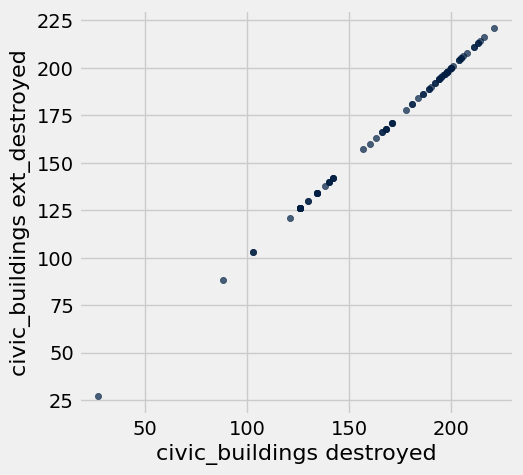

In [142]:
infra_damaged.scatter(fields[1], fields[2])

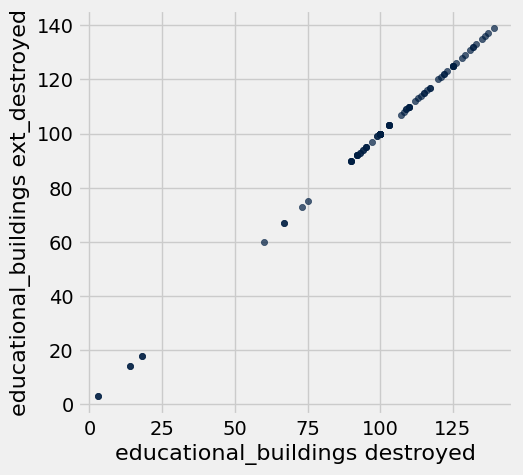

In [143]:
infra_damaged.scatter(fields[3], fields[4])

I can see from the scatter plots that the data was linearly extrapolated, anyways, below I will drop the original columns, and only keep the extrapolated ones:

In [146]:
for field in fields:
    if field == 'report_date':
        continue
    elif field.__contains__('ext'):
        continue
    else:
        infra_damaged = infra_damaged.drop(field)
infra_damaged

report_date,civic_buildings ext_destroyed,educational_buildings ext_destroyed,educational_buildings ext_damaged,places_of_worship ext_mosques_destroyed,places_of_worship ext_mosques_damaged,places_of_worship ext_churches_destroyed,residential ext_destroyed
2023-10-07,5,1,15,2,4,0,80
2023-10-08,11,1,30,4,8,0,159
2023-10-09,16,2,45,6,12,0,790
2023-10-10,22,2,60,8,17,0,1009
2023-10-11,27,3,75,10,21,0,2835
2023-10-12,29,3,75,10,25,0,4188
2023-10-13,31,9,100,12,29,0,5540
2023-10-14,33,14,124,14,33,0,7000
2023-10-15,35,14,143,16,37,0,8840
2023-10-16,37,18,150,18,41,1,10500


In [147]:
# saving the above in the infra csv file
infra_damaged.to_csv('infrastructure-damaged_2025-04-12.csv')

# 2. Exploratory Analysis & Visualization

Firstly reading the cleaned datasets (so that you may continue running just from here):

In [ ]:
gaza_final = Table.read_table('gaza_final.csv')

In [ ]:
infra_damaged = Table.read_table('infrastructure-damaged_2025-04-12.csv')

In [ ]:
daily_casualties_gaza = Table.read_table('casualties_daily_gaza_2025-04-12.csv')

In [ ]:
daily_casualties_wbank = Table.read_table('casualties_daily_west_bank_2025-04-12.csv')

# 3. Hypothesis Testing

In [ ]:
# blabla